In [1]:
# Library Functions

import cv2
import os
import numpy as np
import PIL
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras import layers, datasets, models, optimizers
from keras.models import Model,Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
import pathlib
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Function for Mapped Class Labels

def get_label(label):
  if label == 1 :
    return 'Glioma'
  elif label == 2 :
    return 'Meningioma'
  elif label == 3 :
    return 'Pituitary'
  else :
    return 'No Tumor'

In [3]:
# Enter the test directory

Test_dir = '/content/drive/MyDrive/CNN_MODEL1/Dataset_41/Testing'


In [4]:
# Testing Directory Modification

# Create an ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
test_generator = test_datagen.flow_from_directory(
    Test_dir,
    target_size=(128, 128),
    batch_size=10,
    class_mode='categorical'
)

Found 1698 images belonging to 4 classes.


In [5]:
# Import the CNN Model

model = keras.models.load_model('/content/drive/MyDrive/CNN_MODEL1/EfficientnetB3/model_11/model_multiclass.keras')

In [6]:
# Testing Value_accuracy and Value_Loss

test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

170/170 [==============================] - 713s 4s/step - loss: 7.5947 - accuracy: 0.2426

Test accuracy: 24.26%


In [8]:
# Make predictions and visualize tumor detection

count_no_of_tumor_images = 0

# Iterate over batches
for i in range(len(test_generator)//10):
    images, labels = test_generator[i]
    predictions = model.predict(images)
    fig = plt.figure(figsize=(25, 25))

    # Iterate over all images in the current batch
    for j in range(len(images)):
        original_image = images[j]
        actual_label = np.array(labels[j]).argmax()
        predicted_label = predictions[j].argmax()
        predicted_probability = max(predictions[j])

        original_image *= 255
        original_image = original_image.astype('uint8')

        fig.add_subplot(1, len(images), j + 1)  # Adjusted line
        plt.imshow(original_image)
        plt.axis('off')

        # Display predicted probability and tumor status
        plt.title(f"Probability: {predicted_probability:.2f}\n"
                  f"Predict: {get_label(predicted_label)}\n"
                  f"Actual: {get_label(actual_label)}")

        if predicted_label != 0:  # if predicted label is not zero means tumor present
            count_no_of_tumor_images += 1


plt.show()
print("Number of Tumor Images:", count_no_of_tumor_images)


Output hidden; open in https://colab.research.google.com to view.

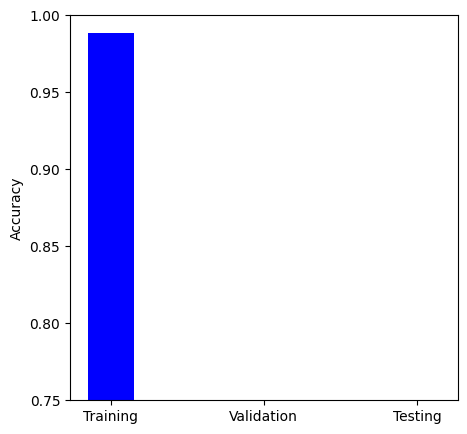

In [11]:
# Visualization Plots

with open('/content/drive/MyDrive/CNN_MODEL1/EfficientnetB3/history_11/training_history_multiclass_11.pkl', 'rb') as file:
    history = pickle.load(file)

    data = {'Training' : max(history['accuracy']),
            'Validation' : max(history['val_accuracy']),
            'Testing' : test_acc}

    fig = plt.figure(figsize = (5, 5))
    plt.bar(data.keys(),data.values(),width = 0.3,color = ['blue', 'orange', 'green'])
    plt.ylim(0.75,1)
    plt.ylabel('Accuracy')
    plt.show()